# This demo shows how to do a general search for similar images

This demo is setup using python3

Follow up more information on product webpage: https://help.aliyun.com/document_detail/113827.html

## flow:
1. imagesearch_product to get product category (my_image_search with instanceName_Product)
2. imagesearch_general to upload images with detected category
3. imagesearch_general to find similar images (my_image_search with instanceName_General)

In [ ]:
#setup envionrmnet for python depedency if necessary
! pip3 install aliyun-python-sdk-imagesearch #--upgrade 
! pip3 install pillow #--upgrade 

# Get access credential from environemnt setting

In [1]:
import os
accessKeyId = os.environ.get('accessKeyId', 'not_set')
accessKeySecret = os.environ.get('accessKeySecret', 'not_set')
instanceName_Product = os.environ.get('instanceName_Product', 'not_set')
instanceName_General = os.environ.get('instanceName_General', 'not_set')

print(instanceName_Product, instanceName_General)

jhsimagesearchproduct1 jhsimagesearchgeneral1


In [2]:
# setup image search connection
product = "ImageSearch"
region = 'cn-shanghai' # , ap-southeast-1(sg)

domain = 'imagesearch.cn-shanghai.aliyuncs.com' # 
endpoint = 'imagesearch.cn-shanghai.aliyuncs.com' # 

from aliyunsdkcore.profile import region_provider
from aliyunsdkcore.client import AcsClient
region_provider.add_endpoint(product, region, domain)
client  = AcsClient(accessKeyId, accessKeySecret, region)
requestClient = client

# Load supporting function

In [18]:
%load_ext autoreload
%autoreload 2
from myutil import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Demo for single image upload and detect object category

image path: HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg /Users/jhs/070_code/AlibabaCloud_ImageSearch_Demo_py2/image/HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg


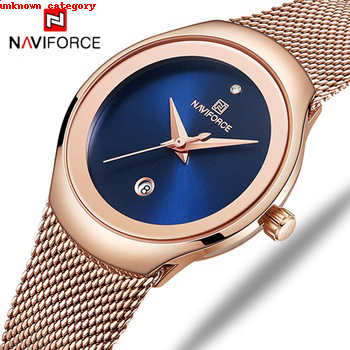

In [4]:
image_name = 'HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg' 
image_folder = './image' 
image_path = os.path.abspath(image_folder+'/'+image_name)

print("image path:", image_name, image_path)
img1 = my_image_preview(image_path, '0,0,0,0', 'unknown category')
img1

In [5]:
# test to upload a single image
image_name = 'HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg'
image_path = os.path.abspath(image_folder+'/'+image_name)
result = my_image_search_for_category_detection_display(requestClient, instanceName_Product, image_path)
print(image_path)

ClientException: SDK.HttpError HTTPConnectionPool(host='imagesearch.cn-shanghai.aliyuncs.com', port=80): Read timed out. (read timeout=10)

# Upload all images into imagesearch_General with detected category

In [6]:
image_folder = './image' 
images = list_images(image_folder)
#pprint(images)

for image_path in images:
    image_name = images[image_path]
    #image_path = './image/1.jpg'
    
    r = my_image_search_for_category_detection(requestClient, instanceName_Product, image_path)
    cate_id = r['cate_id']
    cate_desc = r['cate_desc']
    obj_region = r['obj_region']
    r = my_image_upload_for_similarity_search(requestClient, endpoint, instanceName_General, image_name, image_name, image_path, cate_id, cate_desc, obj_region)
    
    time.sleep(1)

======= 88888888 HTB1_8UmeYus3KVjSZKbq6xqkFXaq.jpg_350x350.jpg
======= 20 HTB1bb4re7WE3KVjSZSyq6xocXXaK.jpg_350x350.jpg


ClientException: SDK.HttpError HTTPConnectionPool(host='imagesearch.cn-shanghai.aliyuncs.com', port=80): Read timed out. (read timeout=10)

similar score:  4.57184171676636;203 similar image:  ./image/HTB1c7BPXAL0gK0jSZFxq6xWHVXac.jpg_350x350.jpg


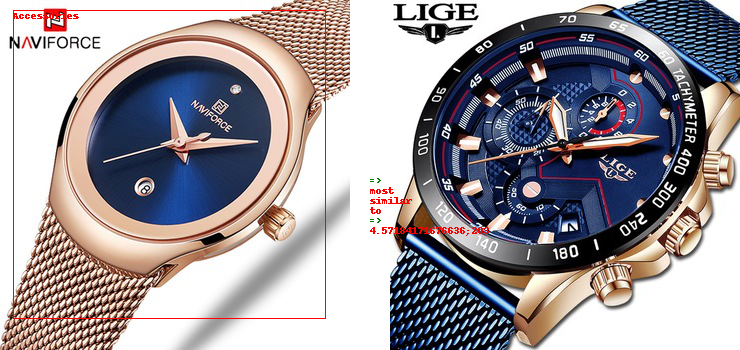

{'Auctions': [{'CategoryId': 88888888,
   'PicName': 'HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg',
   'SortExprValues': '5.37633353624177e+24;0',
   'CustomContent': '{"name": "HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg", "path": "./image/HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg", "cate_id": 5, "cate_desc": "Accessories", "obj_region": "40,330,18,322"}',
   'ProductId': 'HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg'},
  {'CategoryId': 88888888,
   'PicName': 'HTB1c7BPXAL0gK0jSZFxq6xWHVXac.jpg_350x350.jpg',
   'SortExprValues': '4.57184171676636;203',
   'CustomContent': '{"name": "HTB1c7BPXAL0gK0jSZFxq6xWHVXac.jpg_350x350.jpg", "path": "./image/HTB1c7BPXAL0gK0jSZFxq6xWHVXac.jpg_350x350.jpg", "cate_id": 5, "cate_desc": "Accessories", "obj_region": "13,325,10,318"}',
   'ProductId': 'HTB1c7BPXAL0gK0jSZFxq6xWHVXac.jpg_350x350.jpg'},
  {'CategoryId': 88888888,
   'PicName': 'HTB1mPP7e.WF3KVjSZPhq6xclXXar.jpg_350x350.jpg',
   'SortExprValues': '4.0772008895874;201',
   'CustomCo

In [22]:
result = image_search_result_similarity(requestClient, instanceName_General, './image/HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg')
result

In [ ]:
# test to upload a single image
instanceName = instanceName_General
image_name = 'HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg'
image_path = os.path.abspath(image_folder+'/'+image_name)
result = my_image_upload_display(requestClient, endpoint, instanceName, image_name, image_name, image_path)
print(image_path, result)

In [ ]:
# test to upload a list of image
import os
import time
from pprint import pprint

images = {}
for file in os.listdir(image_folder):
    if file.endswith(".jpg") or file.endswith(".png"):
        image_path = os.path.join(image_folder, file)
        # print(os.path.abspath(image_path))
        images[image_path] = file

#pprint(images)

for image_path in images:
    image_name = images[image_path]
    result = my_image_upload_display(requestClient, endpoint, instanceName, image_name, image_name, image_path)
    print(instanceName,  image_name, image_path, result)
    time.sleep(1)

In [ ]:
r = my_image_search_product_display(requestClient, instanceName_Product, image_path)

In [ ]:
result = image_search_result_similarity(requestClient, instanceName, './image/HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg')
result

In [ ]:
# test to upload a list of image

import os
import time
from pprint import pprint


images = {}
for file in os.listdir(image_folder):
    if file.endswith(".jpg") or file.endswith(".png"):
        image_path = os.path.join(image_folder, file)
        # print(os.path.abspath(image_path))
        images[image_path] = file

pprint(images)

for image_path in images:
    image_name = images[image_path]
    result = image_upload(instanceName, image_name, image_name, image_path)
    print(instanceName,  image_name, image_path, result)
    time.sleep(1)

# Delete all images

In [ ]:
# test to upload a list of image
import os
import time
from pprint import pprint

images = {}
for file in os.listdir(image_folder):
    if file.endswith(".jpg") or file.endswith(".png"):
        image_path = os.path.join(image_folder, file)
        # print(os.path.abspath(image_path))
        images[image_path] = file

pprint(images)

for image_path in images:
    image_name = images[image_path]
    request = DeleteImageRequest.DeleteImageRequest()
    request.set_endpoint(endpoint)
    request.set_InstanceName(instanceName_Product)
    request.set_ProductId(image_name)
    response = client.do_action_with_exception(request)
    print(json.loads(response))
    print(instanceName,  image_name, image_path, result)
    time.sleep(1)

In [ ]:
request = DeleteImageRequest.DeleteImageRequest()
request.set_endpoint(endpoint)
request.set_InstanceName(instanceName)
request.set_ProductId("3.png")
response = client.do_action_with_exception(request)
print(response)